In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import spicy as sp

In [3]:
path = 'piano-c.wav'
ipd.Audio(path)

In [4]:
#load audio signal
signal,sr = librosa.load(path)

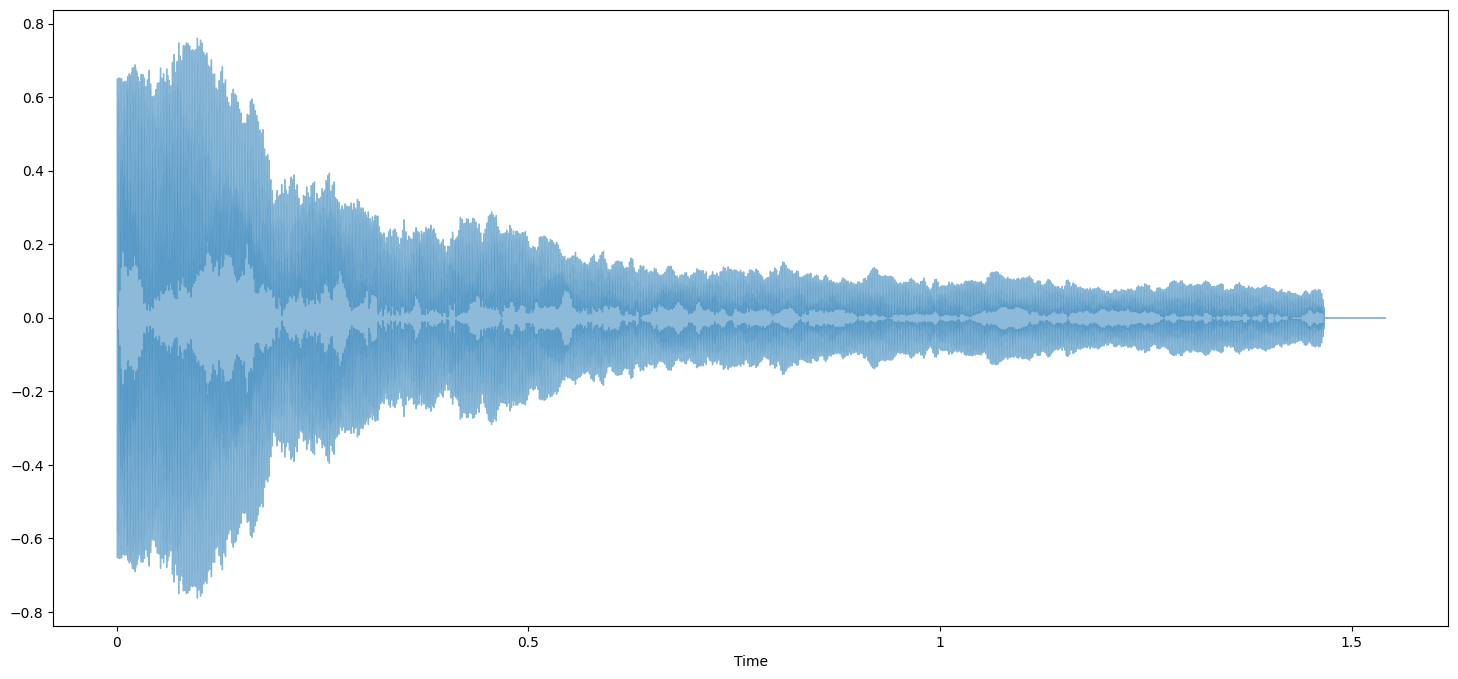

In [6]:
#waveform
plt.figure(figsize=(18,8))
librosa.display.waveshow(signal,sr=sr,alpha = 0.5)
plt.show()

In [7]:
#derive spectrum using fourier transform
fourier_transform = sp.fft.fft(signal)
magnitude = np.abs(fourier_transform)
frequency = np.linspace(0,sr,len(magnitude))


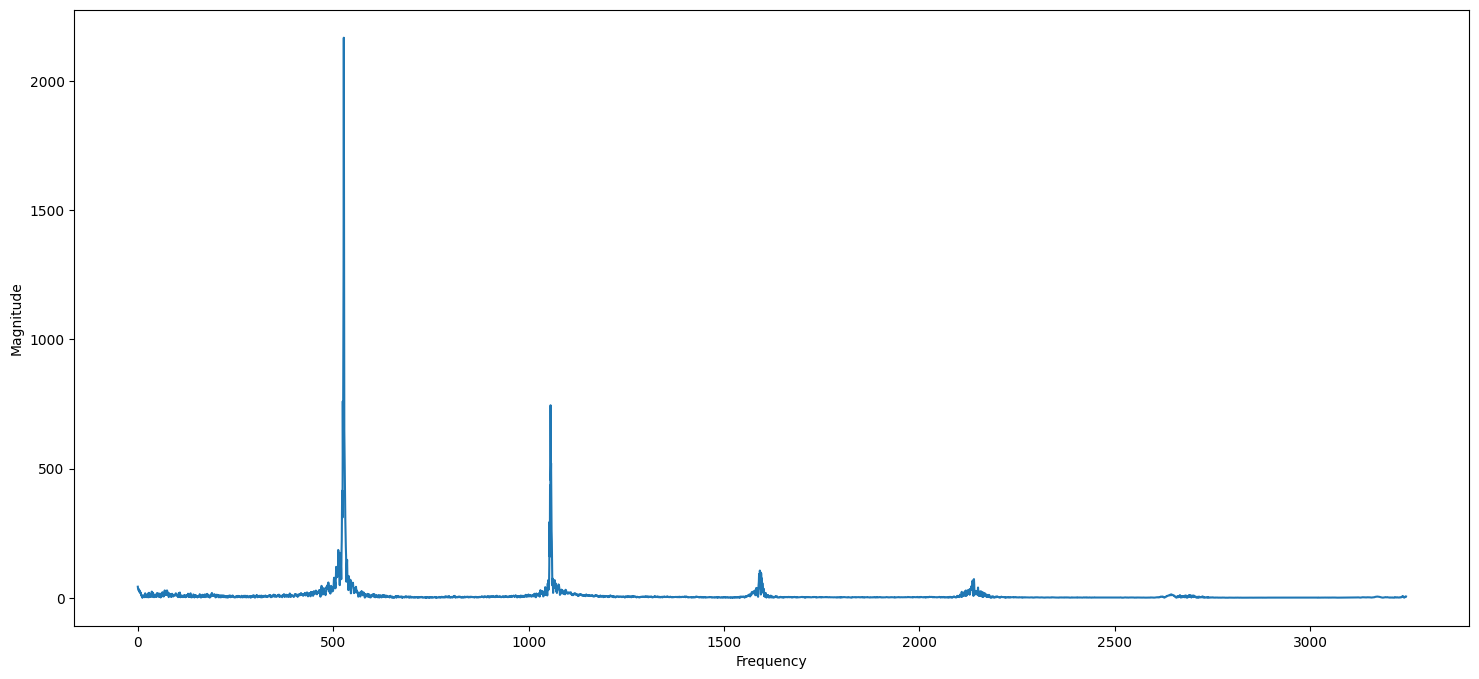

In [8]:
#plotting spectrum
plt.figure(figsize=(18,8))
plt.plot(frequency[:5000],magnitude[:5000]) #magnitude spectrum
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

maximum similarity between frequency and domain at phase 523

In [9]:
len(signal)

33968

In [11]:
duration = 1/sr
duration

4.5351473922902495e-05

In [12]:
duration_for_523 = 1/523
duration_for_523

0.0019120458891013384

In [13]:
d_400_samples = 400*duration
d_400_samples  #DURATION PER SAMPLE FOR 400 SAMPLES

0.018140589569160998

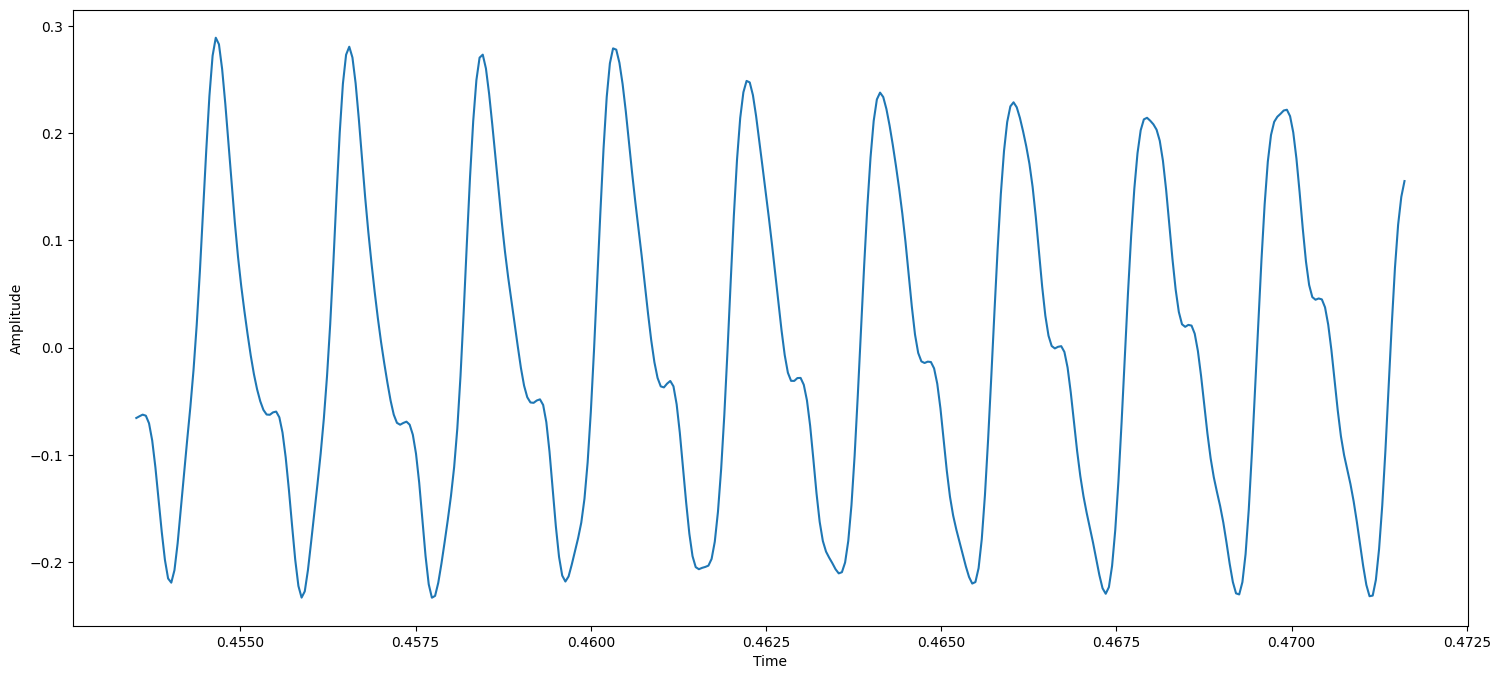

In [14]:
#zooming in to the waveform of time - domain frequency
samples = range(len(signal))
t = librosa.samples_to_time(samples,sr=sr)
plt.figure(figsize=(18,8))
plt.plot(t[10000:10400],signal[10000:10400])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

sin(2π⋅(ft−ϕ))
𝑓
f: The frequency of the sine wave, typically in hertz (Hz).
𝑡
t: Time, which changes over the course of the signal.
𝜙
ϕ: Phase offset in the same units as the sine function's argument (radians).

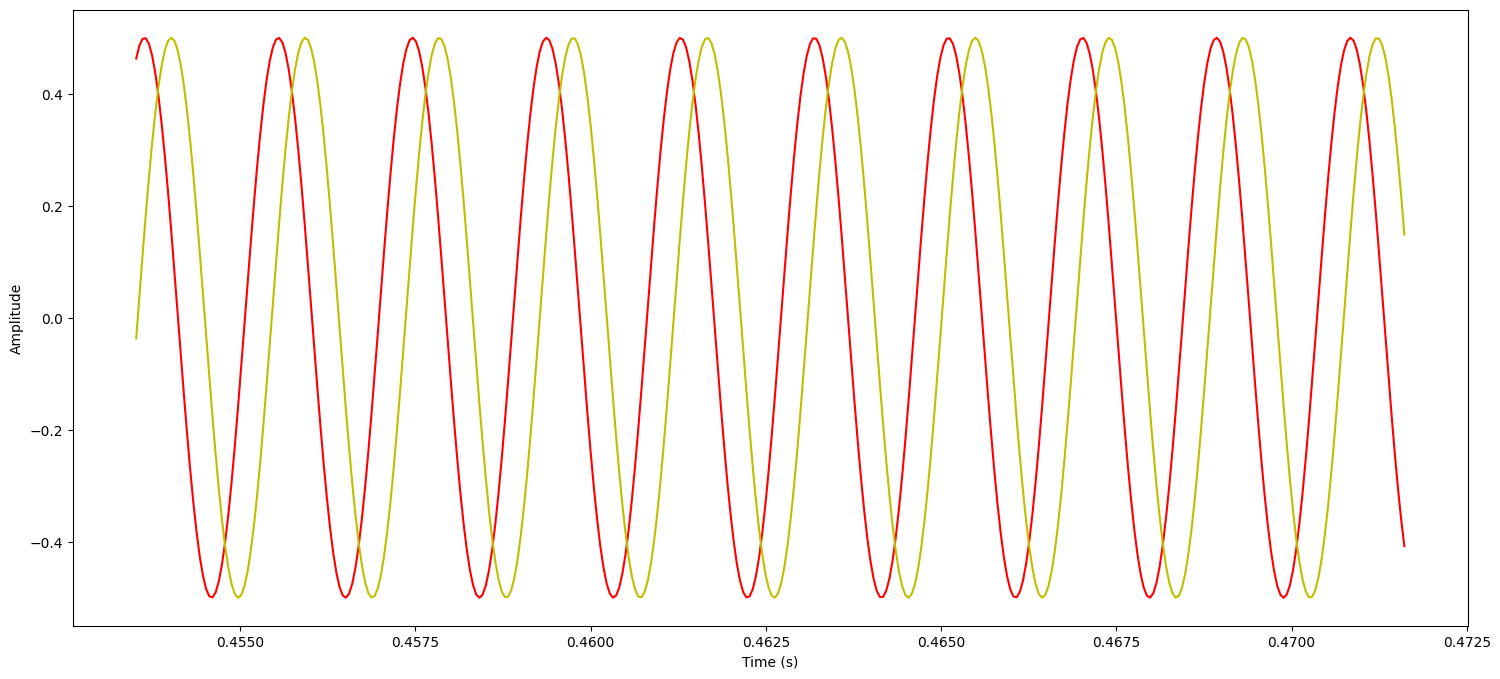

In [15]:
#create a sinusoid or sinewaves
## comparing two waves at different phases
frequency = 523
phase = 0
phase2 = 0.2

sin = 0.5*np.sin(2*np.pi*(frequency*t - phase)) #sin(2π⋅(ft−ϕ)) sinewave formula
sin2 = 0.5*np.sin(2*np.pi*(frequency*t - phase2))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], sin2[10000:10400], color="y")


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

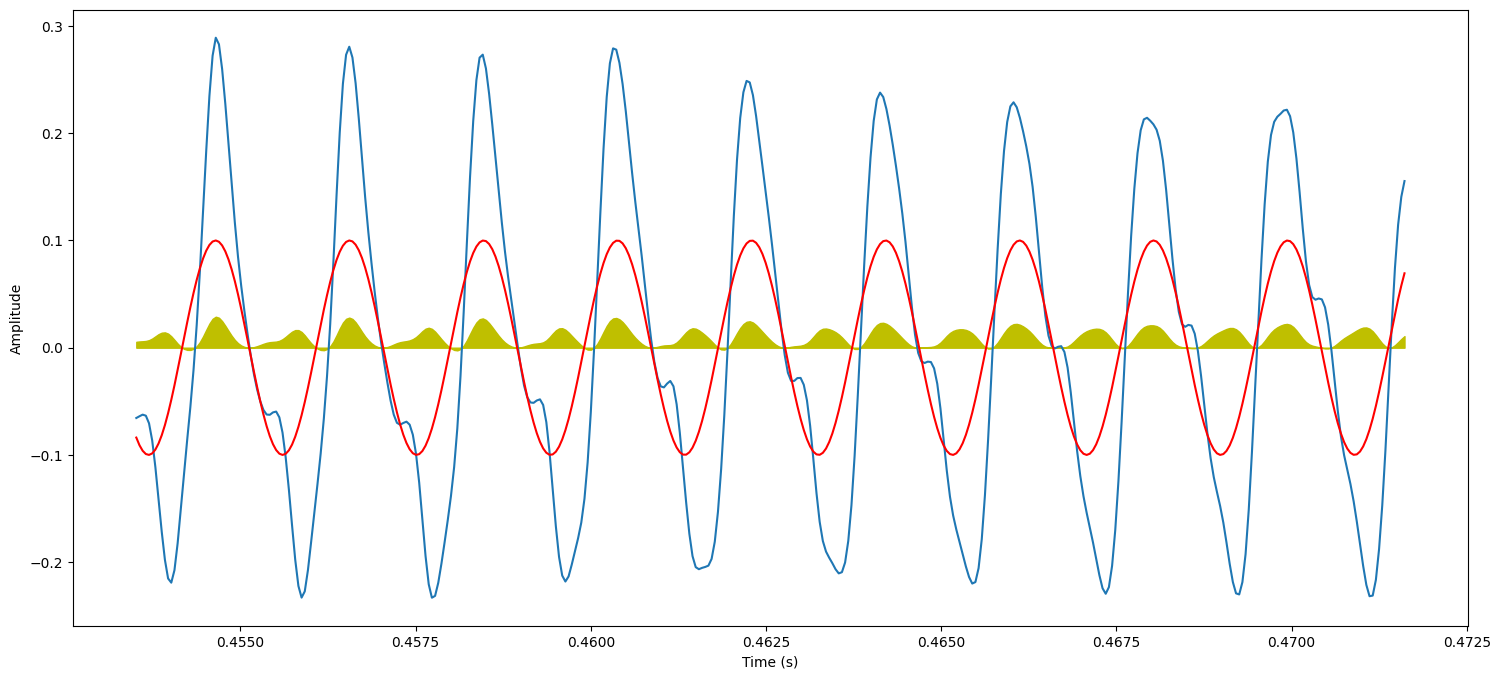

In [16]:
#compare signal and sinusoid
f = 523
phase = 0.53

sin = 0.1 * np.sin(2*np.pi*(f*t - phase))
plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.plot(t[10000:10400], sin[10000:10400], color="r")

plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

we can change phases to get different similarities between waves but here the 523 is the best phase since its align well with the sinusoids
and covering the max area  

trying out diffrent phase values

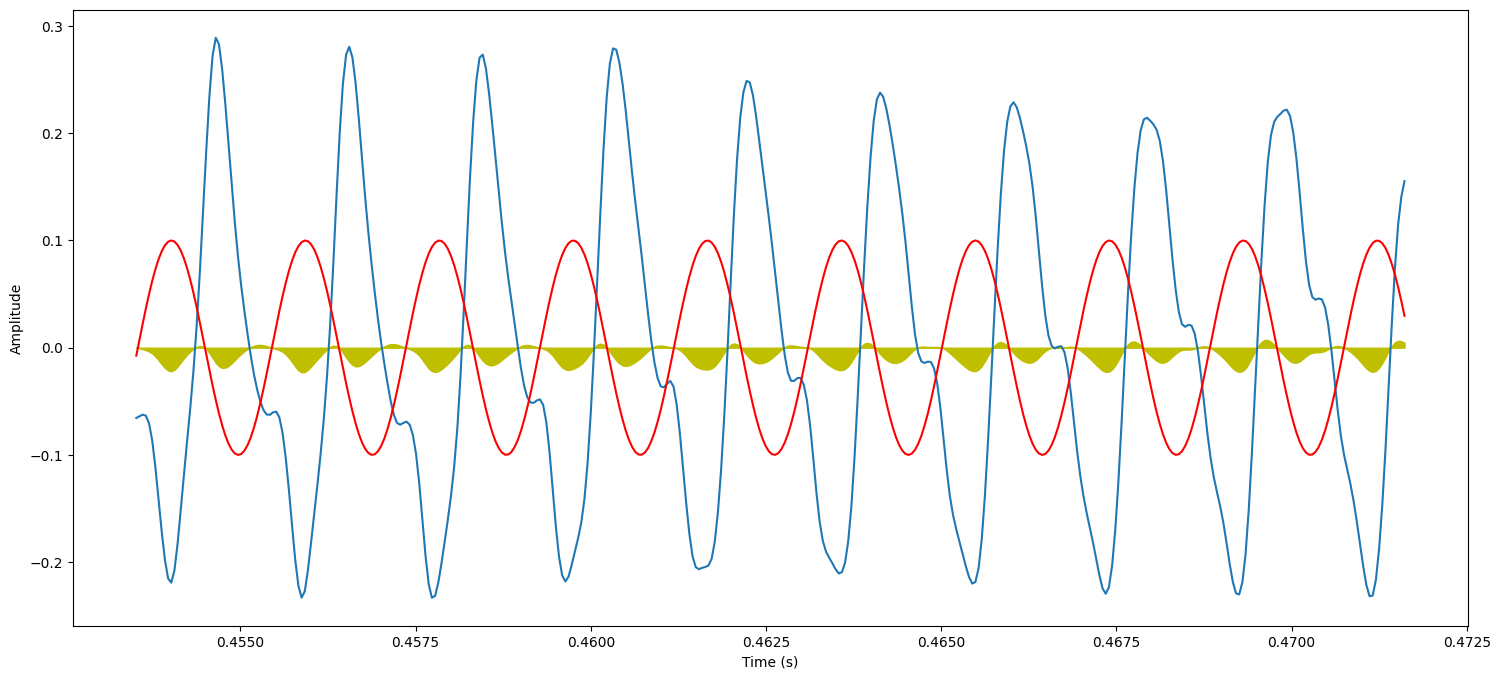

In [17]:
#diffferent phases values
f = 523
phase = 0.2

sin = 0.1 * np.sin(2*np.pi*(f*t - phase))
plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.plot(t[10000:10400], sin[10000:10400], color="r")

plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

here we got negetive all values and waves not alligh well , u can try out different phases